## Project 1 Level 1
## EXPLORATORY DATA ANALYSIS(EDA) ON RETAIL SALES DATA

## Name - Nabeel Ghalib M A Q

## Project Overview :
This Data Analysis project aims to provide insights into the sales performance of the retail store. By performing exploratory data analysis (EDA) I can uncover patterns, trends, and insights that can help the retail business make informed decisions.

## Problem Statement :
Find pattern, trends and insights by performing EDA and give recommendations to improve sales performance.


## Importing Required packages and dataset

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# importing dataset
df  = pd.read_csv('/content/retail_sales_dataset.csv')

In [ ]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


- There are no missing values

In [ ]:
df.duplicated().sum()

0

- There are no duplicated rows

In [ ]:
# Customer id length
df['Customer_id'].str.len().head()

,Customer_id
0,7
1,7
2,7
3,7
4,7


In [ ]:
# Customer id length
df[df['Customer_id'].str.len() != 7]

,Transaction_id,Date,Customer_id,Gender,Age,Product_category,Quantity,Price_per_unit,Total_amount,Year,Month,Day
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120,2023,4,12


- all the customer id's are of same length 7 except last id which is cust1000 whose length is 8

In [ ]:
# renaming columns

df = df.rename(columns={'Transaction ID': 'Transaction_id', 'Customer ID': 'Customer_id', 'Product Category' : 'Product_category', 'Price per Unit' : 'Price_per_unit','Total Amount' : 'Total_amount'})

In [ ]:
# convert date column to datetime type

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# seperating date to year, month and day

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

- Data is ready for analysis

# Descriptive Statistics

In [ ]:
df.describe()

,Transaction_id,Date,Age,Quantity,Price_per_unit,Total_amount,Year,Month,Day
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,2023.002000,6.549000,15.310000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,2023.000000,1.000000,1.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,2023.000000,4.000000,7.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,2023.000000,6.000000,15.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,2023.000000,10.000000,23.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,2024.000000,12.000000,31.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,0.044699,3.452755,8.871674


In [ ]:
df.head()

,Transaction_id,Date,Customer_id,Gender,Age,Product_category,Quantity,Price_per_unit,Total_amount,Year,Month,Day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,6


In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Product_category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [ ]:
df.groupby('Product_category')['Price_per_unit'].unique()

,Price_per_unit
Product_category,
Beauty,"[50, 30, 25, 500, 300]"
Clothing,"[500, 25, 50, 30, 300]"
Electronics,"[30, 25, 300, 500, 50]"


# Observations
- There are 1000 rows
- Min age is 18, Max is 64, mean is 41
- Min quantity sold per transaction is 1, Max is 4
- There are 3 product categories, they are Clothing, Electronics and Beauty Products
- For all the three product the price ranges are 25, 30, 50, 300, 500

# Exploratory Data Analysis (EDA)

In [ ]:
# Month wise Total amount

df.groupby('Month')['Total_amount'].sum().reset_index().sort_values(by = 'Total_amount', ascending = False)

,Month,Total_amount
4,5,53150
9,10,46580
11,12,44690
1,2,44060
0,1,36980
7,8,36960
5,6,36715
6,7,35465
10,11,34920
3,4,33870


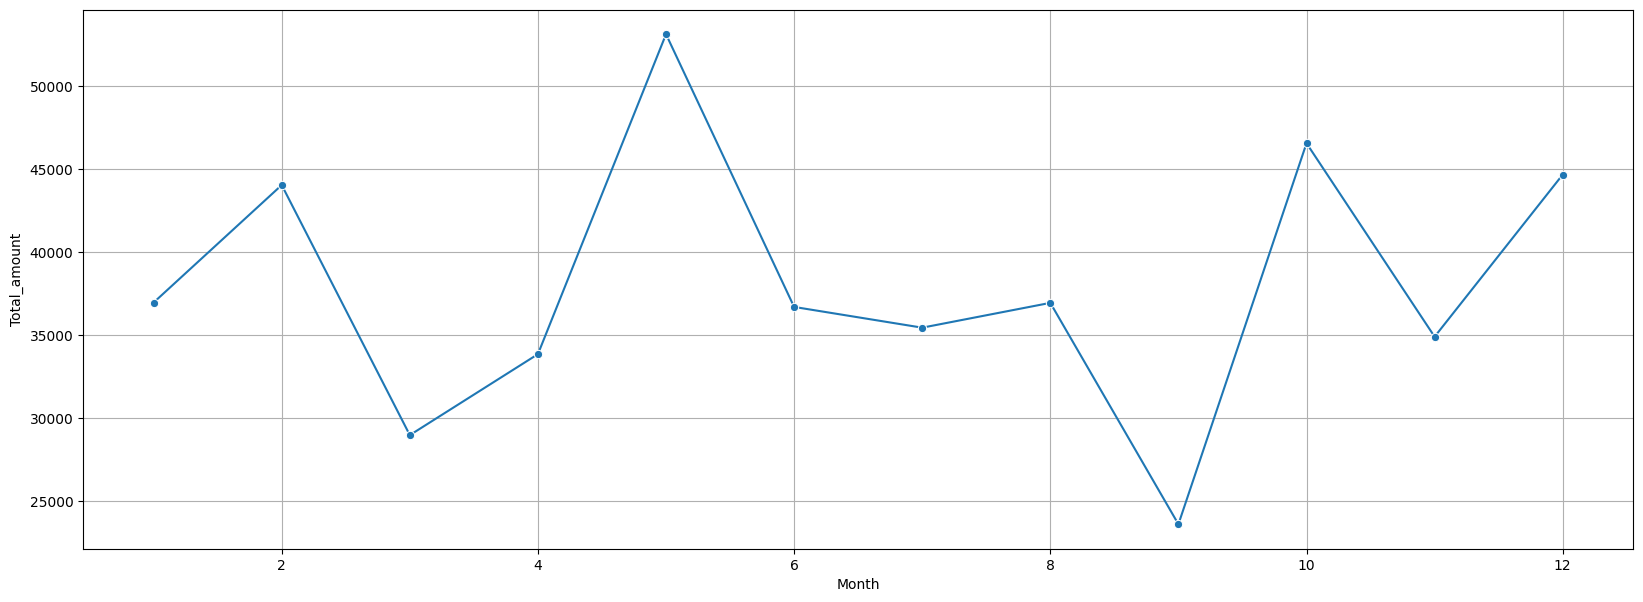

In [ ]:
# Time series analysis

monthly_sales = df.groupby('Month')['Total_amount'].sum().reset_index()

plt.figure(figsize = (20,7))
sns.lineplot(x= 'Month', y = 'Total_amount', data = monthly_sales , marker= 'o')
plt.grid(True)

# Observation
- May has highest total amount sales which is **53150**
- September has lowest total amount sales which is **23620**
- June, July, August was stable for three months and then had significant drop



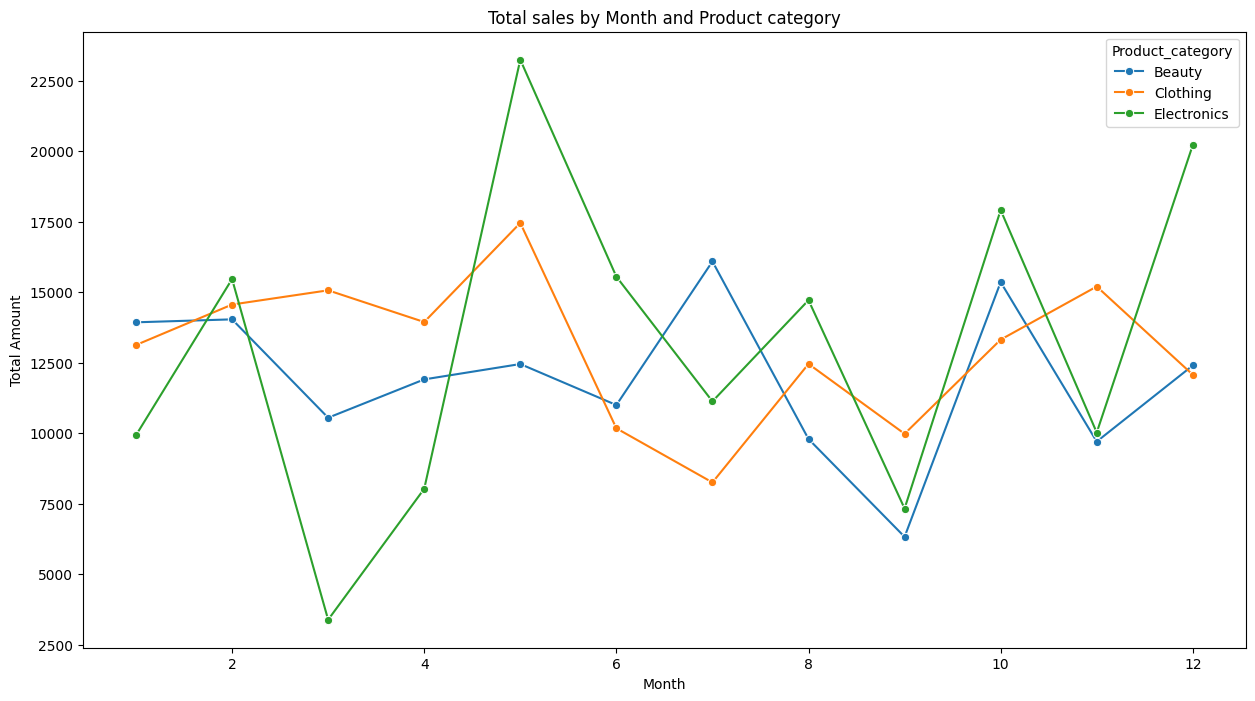

In [ ]:
# Month and product wise Total amount

month_product = df.groupby(['Month','Product_category'])['Total_amount'].sum().reset_index()

plt.figure(figsize=(15,8))
sns.lineplot(x= 'Month', y = 'Total_amount', hue = 'Product_category', data = month_product, marker = 'o')
plt.title("Total sales by Month and Product category")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.show()

# Observations
- Electronics
 - Highest total sales amount happened in the month of May
 - Lowest was at March
- Clothing
 - Highest was at May
 - Lowest July
- Beauty
 - Highest July
 - Lowest September

- There is a significant drop for each product after they reach peak

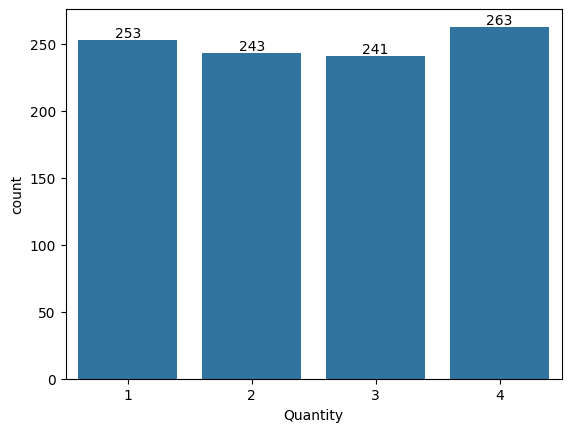

In [ ]:
# Transactions for each Quantity

df.groupby('Quantity').size().reset_index(name = 'Transaction_count')

ax= sns.countplot(x= 'Quantity', data =df)

for container in ax.containers:
  ax.bar_label(container, fmt = '%.0f')


<Axes: xlabel='Product_category', ylabel='Transaction_count'>

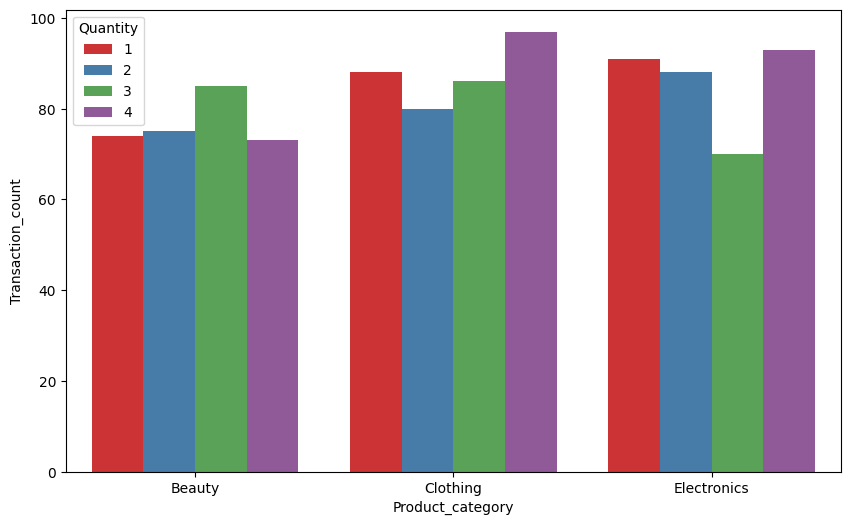

In [ ]:
# Transactions by Category - Quantity

cat_quant = df.groupby(['Product_category', 'Quantity']).size().reset_index(name = 'Transaction_count')


plt.figure(figsize=(10,6))
sns.barplot(x= 'Product_category' , y= 'Transaction_count', hue = 'Quantity', data = cat_quant, palette = 'Set1')


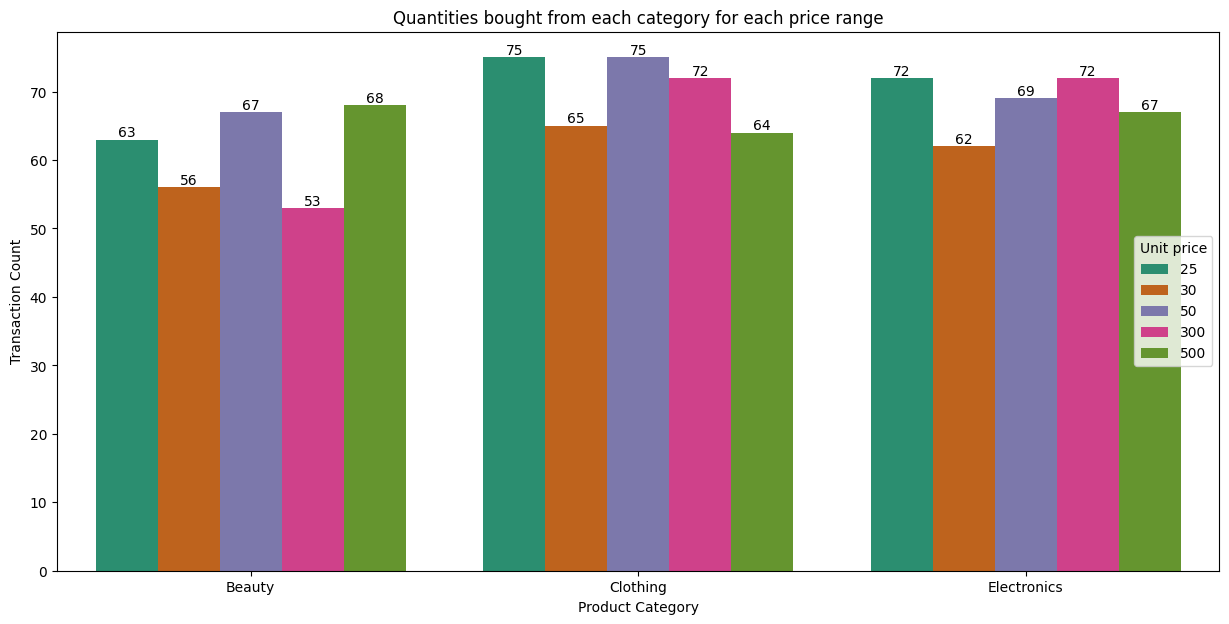

In [ ]:
# price range - category

price_cat = df.groupby(['Product_category', 'Price_per_unit']).size().reset_index(name = 'Transaction_count')

plt.figure(figsize=(15,7))
ax = sns.barplot(x= 'Product_category' , y= 'Transaction_count', hue = 'Price_per_unit', data = price_cat, palette = 'Dark2')

# labeling the values
for container in ax.containers:
  ax.bar_label(container, fmt = '%.0f')

plt.title('Quantities bought from each category for each price range')
plt.xlabel('Product Category')
plt.ylabel('Transaction Count')

# Move the legend
plt.legend(title='Unit price', loc='right')
plt.show()

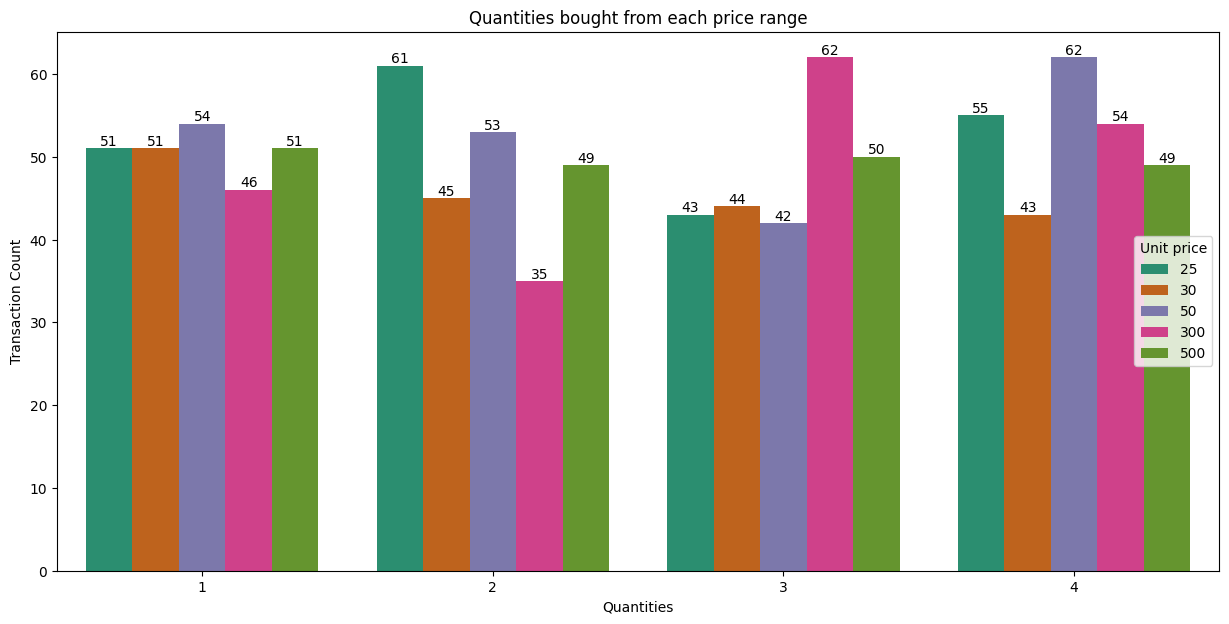

In [ ]:
# price range quantity

price_quant = df.groupby(['Quantity', 'Price_per_unit']).size().reset_index(name = 'Transaction_count')

plt.figure(figsize=(15,7))
ax = sns.barplot(x= 'Quantity' , y= 'Transaction_count', hue = 'Price_per_unit', data = price_quant, palette = 'Dark2')

# labeling the values
for container in ax.containers:
  ax.bar_label(container, fmt = '%.0f')

plt.title('Quantities bought from each price range')
plt.xlabel('Quantities')
plt.ylabel('Transaction Count')

# Move the legend
plt.legend(title='Unit price', loc='right')
plt.show()



# Observations

- Quantity
 - Similar number of transactions have been done for each quantity there is no significant difference
 - 263 customers out of 1000 have bought 4 items per transaction

- Category - Quantity
 - Beauty
   - Most items bought per transaction for Beauty products is 3
 - Electronics and Clothing
   - Most items bought per transaction for both Electronics and Clothing products is 4

- Price - Category
 -  Beauty : The unit prices of 50 and 500 have similar transaction counts, indicating consistent demand at these price points.
 - Clothing : There is a noticeable drop in transaction count for the unit price of 500 compared to the other prices, suggesting lower demand for higher-priced clothing items.
 - Electronics : The unit prices of 30 and 500 have similar transaction counts, while 50 and 300 have higher and almost identical counts.

- Price - Quantity
 - 1 Quantity : It has even distribution across the price range
 - 2 Quantity : The most popular price range is 25
 - 3 Quantity : The most popular price range is 300 and other price ranges have significant drop
 - 4 Quantity : Most transactions have been from 50 price per unit price range


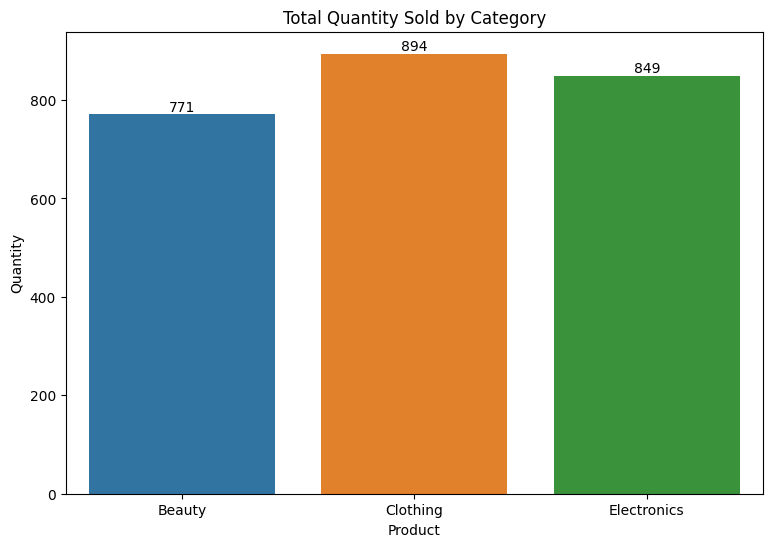

In [ ]:
# Category-Quantity wise sales

category_quantity = df.groupby('Product_category')['Quantity'].sum().reset_index()

plt.figure(figsize=(9,6))
ax = sns.barplot(x= 'Product_category', y = 'Quantity',data = category_quantity, hue='Product_category')

for container in ax.containers:
  ax.bar_label(container, fmt = '%.0f')

plt.title('Total Quantity Sold by Category')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.show()

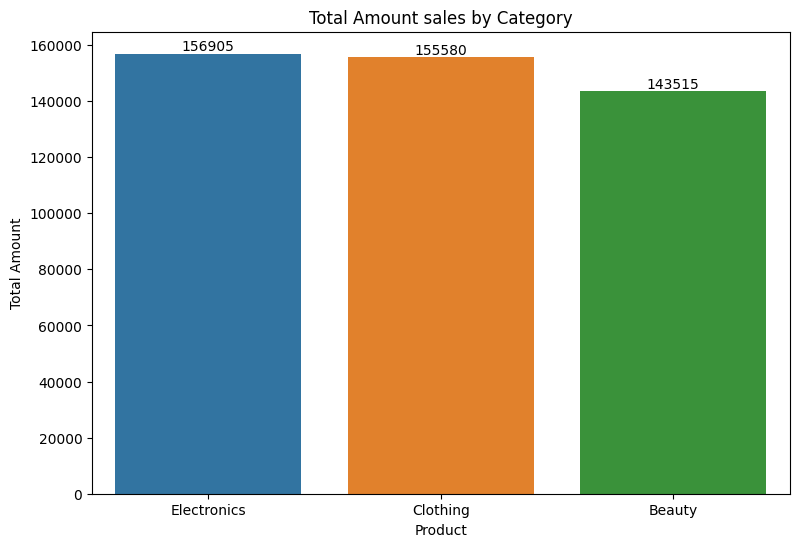

In [ ]:
# Category-Total amount
category_sales = df.groupby('Product_category')['Total_amount'].sum().reset_index().sort_values(by= 'Total_amount',ascending = False)

plt.figure(figsize=(9,6))
ax = sns.barplot(x= 'Product_category', y = 'Total_amount', data = category_sales, hue = 'Product_category')

for container in ax.containers:
  ax.bar_label(container, fmt = '%.0f')

plt.title('Total Amount sales by Category')
plt.xlabel('Product')
plt.ylabel('Total Amount')
plt.show()

# Observation
- Quantity wise Clothing has sold more
- Total amount wise Electronics has sold more
- Least sold Quantity wise aswell as Total amount sales is Beauty products

In [ ]:
# find total male and female

df['Gender'].groupby(df['Gender']).count()

,Gender
Gender,
Female,510
Male,490


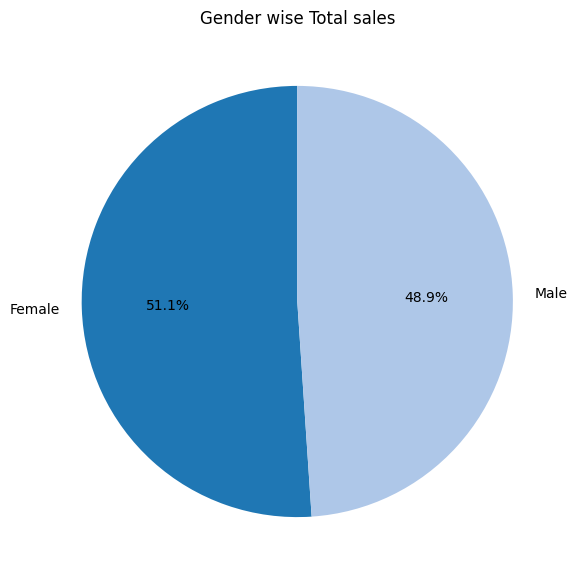

In [ ]:
# gender wise total amount sales

gender_sales = df.groupby('Gender')['Total_amount'].sum().reset_index()

colors = sns.color_palette('tab20', len(gender_sales))

plt.figure(figsize=(7,7))
plt.pie(gender_sales['Total_amount'], labels = gender_sales['Gender'], autopct='%1.1f%%', startangle = 90, colors = colors)
plt.title("Gender wise Total sales")
plt.show()


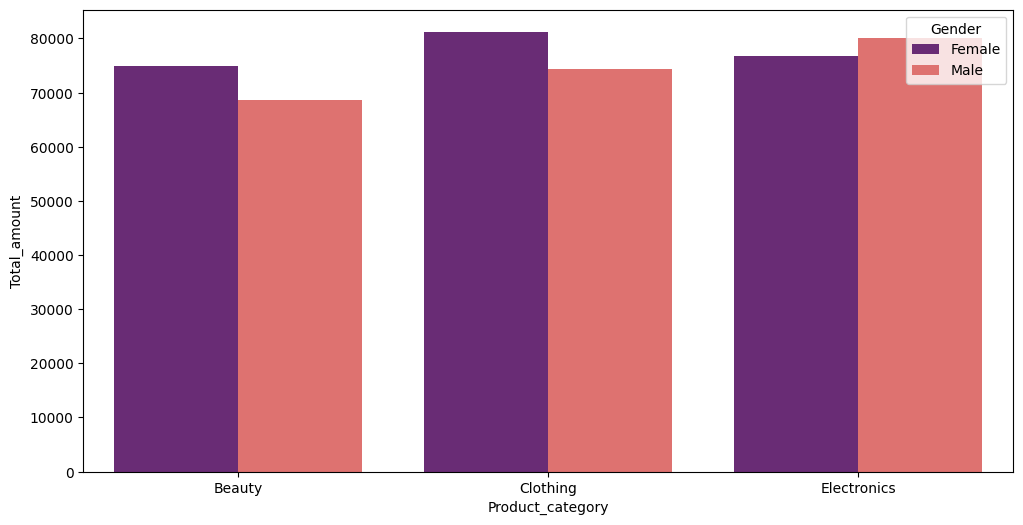

In [ ]:
# Gender and Category wise Total amount sales

gender_category_amount = df.groupby(['Gender','Product_category'])['Total_amount'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x = 'Product_category', y= 'Total_amount', data = gender_category_amount, hue = 'Gender' , palette = 'magma')
plt.show()

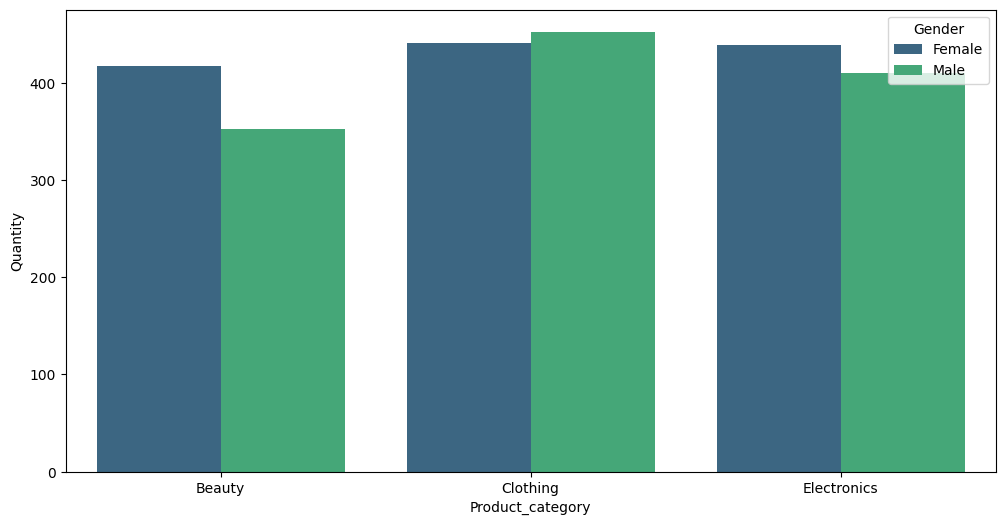

In [ ]:
# Gender Category quantity
gender_category_quant = df.groupby(['Gender','Product_category'])['Quantity'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x = 'Product_category', y= 'Quantity', data = gender_category_quant, hue = 'Gender' , palette ='viridis')
plt.show()

# Observations
- Total customers by Gender : Female - 510 , Male - 490
- Female
 - There is no significant difference in the products they purchase, they are all in similar range
 - Female purchase all the products in similar price range
- Male
 - Clothing and Electronics products have been bought more and Beauty products are least bought
 - Electronics of higher price have been purchased

- For both the genders most bought items are Clothing and Electronics

In [ ]:
df['Age'].describe()

,Age
count,1000.00000
mean,41.39200
std,13.68143
min,18.00000
25%,29.00000
50%,42.00000
75%,53.00000
max,64.00000


<ipython-input-34-1964c0e13da7>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby(pd.cut(df['Age'], bins=bins, labels=labels, right=False))['Total_amount'].sum().reset_index()


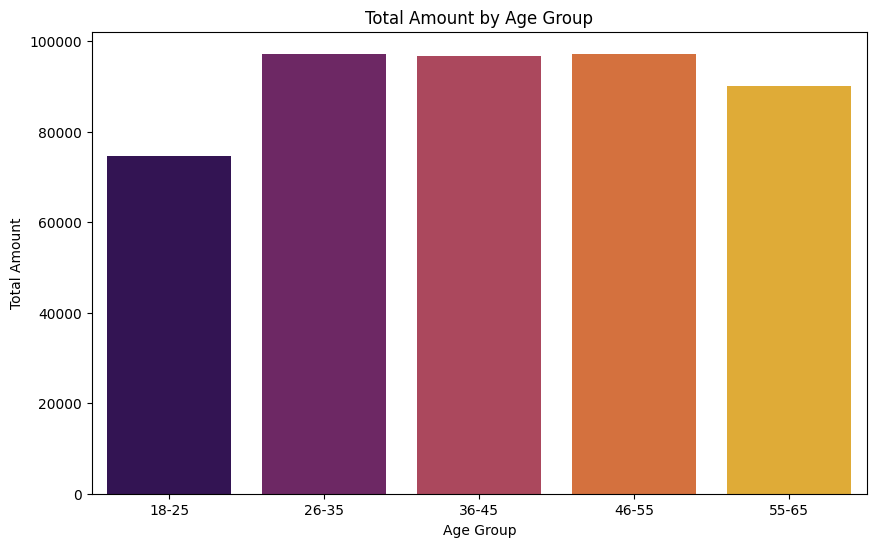

In [ ]:
# Age Group wise Total amount sales

bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '55-65']

age_group_sales = df.groupby(pd.cut(df['Age'], bins=bins, labels=labels, right=False))['Total_amount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x= 'Age', y = 'Total_amount', data = age_group_sales, hue = 'Age', palette = 'inferno')

plt.title('Total Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()

# Observations

- The age group 26 - 55 have purchased more
- 18 - 25 are least purchasing age group


<ipython-input-53-38298ac90397>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_product = df.groupby([pd.cut(df['Age'], bins=bins, labels=labels, right=False),'Product_category'])['Total_amount'].sum().reset_index()


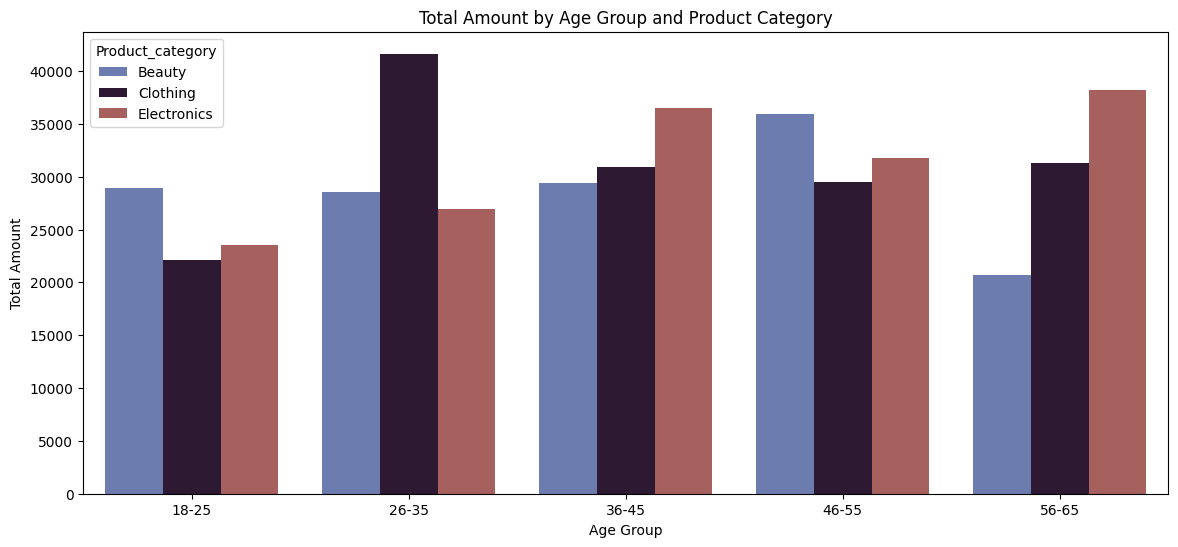

In [ ]:
# Age - Product Total amount

bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

age_product = df.groupby([pd.cut(df['Age'], bins=bins, labels=labels, right=False),'Product_category'])['Total_amount'].sum().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x= 'Age', y = 'Total_amount', data = age_product, hue = 'Product_category', palette = 'twilight')

plt.title('Total Amount by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()
plt.show()

# Observations

- 18 - 25 : Beauty product is popular among this age group
- 26 - 35 : Clothing products has done very well among this group
- 36 - 45 : Electronics is popular, clothing and beauty are close to each other
- 46 - 55 : Beauty is sold more
- 56 - 65 : Electronics is popular among this group and beauty product is less bought by them


# Recommendations

#### General Sales Trends:
1. **Seasonal Promotions**:
   - Given that May has the highest sales, consider running major promotions or product launches in May to capitalize on higher consumer spending.
   - Address the significant drop in sales during September by introducing back-to-school promotions, end-of-summer sales, or other incentives to boost sales during this period.

#### Product-Specific Recommendations:
2. **Electronics**:
   - With the highest sales in May and the lowest in March, it may be beneficial to create marketing campaigns to boost sales during the low period in March.
   - Focus on maintaining sales momentum after the peak by introducing new products or upgrades.

3. **Clothing**:
   - The highest sales occur in May and the lowest in July. Consider launching mid-year collections or sales events in July to attract customers and boost sales.

4. **Beauty**:
   - Peak sales in July and the lowest in September suggest a summer demand for beauty products. Consider introducing new summer beauty lines or limited-edition products during this time.
   - Address the drop in September with targeted promotions or bundling beauty products with other popular items.

#### Quantity-Based Insights:
5. **Product Quantity**:
   - Since a significant number of transactions involve the purchase of four items, consider offering bundle deals or discounts for purchasing multiple items to encourage higher sales volumes.
   - Given the stable transactions across quantities, ensure inventory levels are sufficient to meet consistent demand.

#### Price and Category Insights:
6. **Beauty Products**:
   - Maintain inventory and marketing focus on unit prices of 50 and 500 due to consistent demand.
   - Explore reasons for lower demand in other price ranges and adjust pricing strategies accordingly.

7. **Clothing**:
   - Given the lower transaction count for higher-priced items (500), consider introducing mid-range price options or more value-for-money offerings.
   - Explore customer preferences through surveys or feedback to better understand the pricing sensitivity.

8. **Electronics**:
   - Ensure that the price points of 30 and 500 remain competitive, as they have similar transaction counts.
   - Focus on maintaining the high demand for price points 50 and 300 through targeted promotions and product offerings.

#### Demographic Insights:
9. **Gender-Based Recommendations**:
   - **Female Customers**:
     - Maintain a diverse product range across all categories and price points, as females show consistent purchasing behavior.
   - **Male Customers**:
     - Focus on marketing higher-priced electronics and clothing items, as males show a preference for these categories.
     - Consider targeted advertising for beauty products to potentially increase interest among male customers.

10. **Age-Based Recommendations**:
    - **18-25 Age Group**:
      - Promote beauty products more intensively, as this age group shows higher interest.
      - Explore opportunities to introduce more budget-friendly options to cater to this age group's purchasing power.
    - **26-35 Age Group**:
      - Capitalize on the popularity of clothing products by introducing trendy and seasonally relevant collections.
    - **36-45 Age Group**:
      - Focus on electronics, as this age group shows a strong preference for these products.
      - Ensure a competitive mix of clothing and beauty products, as their sales are closely matched.
    - **46-55 Age Group**:
      - Emphasize beauty products, which are sold more in this age group.
      - Explore marketing campaigns targeting the specific needs and preferences of this demographic.
    - **55-65 Age Group**:
      - Focus on electronics, as this age group shows a preference for these products.
      - Consider offering educational content or workshops on electronics to engage this demographic.

By addressing these insights and implementing targeted strategies, you can enhance sales performance, optimize inventory management, and better cater to customer preferences across different segments.
